# Tensorflow Object Detection API
- Tensorflow Object Detection API는 TensorFlow를 이용해서 Object Detection 모델을 train하고 deploy하는 것을 쉽게 도와주는 오픈소스 프레임워크.
- https://github.com/tensorflow/models/tree/master/research/object_detection
- Tutorial: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/

# Custom (Image) Data 구하기

# Custom (Image) Data Labeling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 전단계
- 구글드라이브 연결
- 상대경로로 할 것이므로 Process.ipynb 있는 디렉토리로 이동
- workspace/images 에 이미지 데이터셋 넣고 압축 푼다. 

In [17]:
%cd /content/drive/MyDrive/Object_detection/object_detection_workspace


/content/drive/MyDrive/Object_detection/object_detection_workspace


In [18]:
%pwd

'/content/drive/MyDrive/Object_detection/object_detection_workspace'

In [ ]:
# 이미지, annotation파일들을 workspace/images 디렉토리로 이동
#압축 풀기 
!unzip hand_images.zip -d /content/drive/MyDrive/Object_detection/object_detection_workspace/workspace/images


Archive:  hand_images.zip
replace /content/drive/MyDrive/Object_detection/object_detection_workspace/workspace/images/five-a95d115e-b15c-11eb-ae50-e82a44a807ba.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Tensorflow Object Detection 2 API 설치
1. clone (재시작시 다시 할필요없음)
    - `!git clone https://github.com/tensorflow/models.git`
1. PYTHONPATH 환경설정에 models/research 추가 (재시작시 실행) 
1. 필요 모듈 설치(재시작시 실행)
    - `!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk`
    - `!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools`
1. proto 파일 컴파일 (재시작시 실행 필요없음) -> 구글드라이브에 설치했기때문
    - models/research 경로로 이동
        - `%cd models/research`
    - `!protoc object_detection/protos/*.proto --python_out=.`
1. setup.py 를 이용해 필요한 모듈 추가 설치 (재시작시 실행)
    - setup.py를 현재 디렉토리로 카피
        - `!cp object_detection/packages/tf2/setup.py . `
    - 설치
        - `!python -m pip install . `
    - 설치 확인 - 아래 스크립트 실행시 오류 없이 실행되면 설치 잘 된 것임.
        - `!python object_detection/builders/model_builder_tf2_test.py`
1. 원래 디렉토리로 이동 (재시작시 실행)
    - `%cd ../..`        

In [19]:
%pwd

'/content/drive/MyDrive/Object_detection/object_detection_workspace'

In [ ]:
# tensorflow object detection api clone 하기. 다시 안해도 됨
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [5]:
# 2. PYTHONPATH 환경설정. models/research 경로. /-> 껏다가 다시키면 다시 실행해줘야함./영구적이지 않아서. 환경설정을 계속해야함..
# 변수명 PYTHONPATH / 값 :/content/drive/MyDrive/Object_detection/object_detection_workspace/models/research
import os
os.environ['PYTHONPATH'] += ':/content/drive/MyDrive/Object_detection/object_detection_workspace/models/research'

In [25]:
os.environ['PYTHONPATH'] # os.environ -> 현재 운영체제의 환경변수를 갖고있는 딕셔너리..

'/env/python:/content/drive/MyDrive/Object_detection/object_detection_workspace/models/research'

In [7]:
# 3. 필요 모듈 / 프로그램 설치 -> 다시해야함 / 구글 드라이브에 해놓으거 이외에는 다시 다해야함 
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

Selecting previously unselected package python-bs4.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [26]:
!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools

In [27]:
%pwd


'/content/drive/MyDrive/Object_detection/object_detection_workspace'

In [24]:
#4. proto 파일들 컴파일  다시 안해도됨
%cd models/research # 경로에 와서

[Errno 2] No such file or directory: 'models/research # 경로에 와서'
/content/drive/MyDrive/Object_detection/object_detection_workspace


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [28]:
# 셋업파일을 복사해와서 실행해서 TFOD API 를 설치 -> 다시 실행해야함.. 
!cp object_detection/packages/tf2/setup.py .

cp: cannot stat 'object_detection/packages/tf2/setup.py': No such file or directory


In [29]:
!pip install avro-python3 apache-beam tf-slim six lvis tf-models-official
# 재실행시 setup.py 실행하지 않고 추가 의존 라이브러리만 설치

     |████████████████████████████████| 9.6MB 5.0MB/s 
     |████████████████████████████████| 358kB 45.5MB/s 
     |████████████████████████████████| 1.1MB 34.0MB/s 
     |████████████████████████████████| 2.3MB 38.6MB/s 
     |████████████████████████████████| 829kB 39.5MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 153kB 45.1MB/s 
     |████████████████████████████████| 686kB 38.3MB/s 
     |████████████████████████████████| 38.2MB 1.2MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 174kB 41.8MB/s 
     |████████████████████████████████| 645kB 32.7MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 1.2MB 33.8MB/s 
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=c12660bc97d9876fc1b086289efe7fe04b0625f7424e394c66a1b7d7472962b8
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c

In [ ]:
!python -m pip install .  #(재시작시 실행)

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
# 설치 잘 되었는지 확인
!python object_detection/builders/model_builder_tf2_test.py

python3: can't open file 'object_detection/builders/model_builder_tf2_test.py': [Errno 2] No such file or directory


In [ ]:
# base 디렉토리로 이동
%cd ../..

/content/drive/My Drive


# 경로 설정
- 디렉토리들 변수로 설정

In [30]:
import os

In [31]:
BASE_PATH = 'workspace' # 작업시 생기는 파일들을 저장할 root 디렉토리
SCRIPT_PATH = 'scripts' # utility python script 들이 저장된 디렉토리.
TF_OD_API_PATH = 'models' # Tensorflow object detection api 설치 경로.

IMAGE_PATH = os.path.join(BASE_PATH, "images") # image data들 , annotation 파일들이 저장된 디렉토리

LABEL_MAP_PATH = os.path.join(BASE_PATH, 'labelmap') # Label map 파일이 저장된 디렉토리.
LABEL_MAP_FILE_PATH = os.path.join(LABEL_MAP_PATH, 'label_map.pbtxt') # labelmap 파일의 경로 

TF_RECORD_PATH = os.path.join(BASE_PATH, 'tfrecord') # TFReocord 파일들을 저장할 경로.

MODEL_PATH = os.path.join(BASE_PATH, 'model') # pretrained 모델 fine tuning 한 모델. weight(ckpt), pipeline.config(설정파일)을 저장할 경로. 
CHECK_POINT_PATH = os.path.join(MODEL_PATH, 'checkpoint') # 학습도중에 중간중간 저장되는 weight
EXPORT_MODEL_PATH = os.path.join(MODEL_PATH, 'export_model') # fine tuning한 최종 모델을 저장할 경로.
PIPELINE_CONFIG_PATH = os.path.join(MODEL_PATH, 'pipeline.config') # pipeline. config(설정파일)의 경로.

PRE_TRAINED_MODEL_PATH = os.path.join(BASE_PATH, 'pre_trained_model') # 전이학습 시킬 model을 저장할 경로.

# Custom data(나의 data) 학습 시키기

## 다음 세가지 작업이 필요
<span style='font-weight:bold;font-size:1.3em'>1. Label Map 파일 생성</span>
- 분류 하고자 하는 object의 class와 그 class id 를 pbtxt text 파일로 작성
- `models\research\object_detection\data`

```
item {
  id: 1
  name: 'aeroplane'
}

item {
  id: 2
  name: 'bicycle'
}
...
```

<span style='font-weight:bold;font-size:1.3em'>2. pipeline.config</span>
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일
- `models\research\object_detection\samples\configs`
- 어떻게 학습, 검증할건지.. 

<span style='font-weight:bold;font-size:1.3em'>3. 학습/검증/테스트에 사용할 데이터셋을 TFRecord 로 구성</span>
- 주요 데이터셋을 TFRecord로 생성하는 코드
- `models\research\object_detection\dataset_tools`

# 데이터셋 준비
- images에 있는 데이터들을 train/test 용으로 분리.

In [ ]:
# 디렉토리 만들기 
train_dir = os.path.join(IMAGE_PATH, 'train')# train 데이터 저장 경로
test_dir = os.path.join(IMAGE_PATH,'test')

os.makedirs(train_dir, exist_ok= True)
os.makedirs(test_dir, exist_ok= True)

In [ ]:
# 카피
file_list = os.listdir(IMAGE_PATH) # IMAGE_PATH에 있는 파일/폴더 명을 조회.
# len(file_list)
# file_list[:5]
image_list = [fname for fname in file_list if os.path.splitext(fname)[-1]=='.jpg'] # 확장자가 .jpg인 파일 조회
#len(image_list)



81

In [ ]:
# shutill.copy(원본경로, 복사된거 저장될 경로)
import shutil

count = 0
current_label = None
train_len = 12

for img_name in image_list:
    #이미지 이름이 하나씩 나오게 할거임.. 
    label = img_name.split('-')[0] # one, two,three ....만갖고옴.
    # 리스트로 one 과 나머지로 짤림
    # annotation 파일이름 조회
    ann_name = os.path.splitext(img_name)[0]+ '.xml' # 확장자와 나머지로 나눔 그리고 파일명에 xml을 붙임
    if current_label != label: # 새로운 라벨에 대한 카피 시작
        count =0
        current_label = label
    # 복사 작업
    img_path = os.path.join(IMAGE_PATH, img_name)
    ann_path = os.path.join(IMAGE_PATH, ann_name)
    train_path = os.path.join(IMAGE_PATH, 'train')
    test_path = os.path.join(IMAGE_PATH, 'test')

    # count가 train_len(12)보다 작으면 train 폴더에 copy, 이상이면 test폴더에 카피 할것.
    if count <12:
        shutil.copy(img_path, train_path) # 이미지 카피
        shutil.copy(ann_path, train_path) # 어노테이션 카피

    else:
        shutil.copy(img_path, test_path)
        shutil.copy(ann_path, test_path)
    count +=1

In [ ]:
len(os.listdir('workspace/images/train')) # 132개가 복사되서 train으로 저장됨

0

In [ ]:
len(os.listdir('workspace/images/test'))# 36개가 복사되서 test으로 저장됨

0

# Label Map 생성
- text 에디터에서 직접작성
- File IO를 이용해 코드상에서 파일 작성

In [ ]:
labels =[
        {"name":'one', 'id':1},
        {"name":'two', 'id':2},
        {"name":'three', 'id' :3},
        {"name":'four', 'id' :4},
        {"name":'five', 'id' :5}
]

with open(LABEL_MAP_FILE_PATH,'wt')as fw :
    for label in labels:
        fw.write('item {\n')
        fw.write('\tname:"{}"\n'.format(label['name']))
        fw.write('\tid:{}\n'.format(label['id']))
        fw.write("}\n")

# TFRecord 생성
- script/generate_tfrecord.py
    - command line argument
     - -x, --xml_dir: annotation 파일이 있는 경로
     - -l, --labels_path: Label map 의 경로(파일명 포함
     - -o, --output_paht: 생성된 tfrecord파일을 저장할 디렉토리.

     - -i, --image_dir: 이미지데이터가 있는 디렉토리 경로(annotation동일한 위치에 있으면 생략가능-x)


In [ ]:
#generate_tfrecord.py 를 실행하면 생성된다.. 옵션만 설정해주면 tfrecord를 만들어준다.
# import argparse : # 6교시.. 

In [ ]:
#train set
f'!python ./{SCRIPT_PATH}/generate_tfrecord.py -x {os.path.join(IMAGE_PATH, "train")} -l {LABEL_MAP_FILE_PATH} -o {os.path.join(TF_RECORD_PATH,"train.tfr")}'

'!python ./scripts/generate_tfrecord.py -x workspace/images/train -l workspace/labelmap/label_map.pbtxt -o workspace/tfrecord/train.tfr'

In [ ]:
# test
f'!python ./{SCRIPT_PATH}/generate_tfrecord.py -x {os.path.join(IMAGE_PATH, "test")} -l {LABEL_MAP_FILE_PATH} -o {os.path.join(TF_RECORD_PATH,"test.tfr")}'

'!python ./scripts/generate_tfrecord.py -x workspace/images/test -l workspace/labelmap/label_map.pbtxt -o workspace/tfrecord/test.tfr'

In [ ]:
!python ./scripts/generate_tfrecord.py -x workspace/images/train -l workspace/labelmap/label_map.pbtxt -o workspace/tfrecord/train.tfr

Successfully created the TFRecord file: workspace/tfrecord/train.tfr


In [ ]:
!python ./scripts/generate_tfrecord.py -x workspace/images/test -l workspace/labelmap/label_map.pbtxt -o workspace/tfrecord/test.tfr

Successfully created the TFRecord file: workspace/tfrecord/test.tfr


# Pretrained Model Download
- Tensorflow object detection API는 MS COCO 2017 dataset으로 미리 학습시킨 다양한 Object Detection 모델을 제공한다.
- tf2 detection Model Zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
- SSD MobileNet V2 FPNLite 320x320 다운로드
    - 성능은 떨어지지만 학습속도가 빠르다.

In [ ]:
#!wget 다운 받을 주소 url 넣으면 현재 디렉토리에 다운을 받아줌. 리눅스 명령어

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2021-05-14 07:39:31--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.125.128, 2404:6800:4008:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.125.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  34.5MB/s    in 0.6s    

2021-05-14 07:39:33 (34.5 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
!tar -zxvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C workspace/pre_trained_model/

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# Pipeline.config 설정 변경

## pipeline.config  파일 개요
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일
- 구조
    - https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/configuring_jobs.md
    - **model**
        - 사용하는 모델에 대한 설정
        - class 개수
        - 입력이미지 size
        - anchor 설정
    - **train_config**
        - Train(학습)관련 설정
        - batch_size
            - 사용하는 GPU의 메모리 크기에 맞게 조절한다.
        - image augmentation관련 설정 등
        - optimizer관련 설정
        - 학습에 사용할 weight 파일의 경로
    - **train_input_reader**
        - labelmap 파일 경로
        - train tfrecord 파일 경로
    - **eval_config**
        - evaluation(평가)을 위해 사용하는 metric 설정
    - **eval_input_reader**
        - labelmap 파일 경로
        - evaluation tfreord 파일 경로
        

## Pretrain model의 pipeline.config 파일 카피
- pretrained 모델의 압축을 풀면 pipeline.config 파일이 있다.
- workspace\model 로 copy 한다.

In [ ]:
# configfile 카피 ㅎ함
f"!cp {os.path.join(PRE_TRAINED_MODEL_PATH, 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8','pipeline.config')} {PIPELINE_CONFIG_PATH}"

'!cp workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config workspace/model/pipeline.config'

In [ ]:
# configfile 카피 함
!cp workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config workspace/model/pipeline.config

## pipeline.config 설정 변경
- pipeline.config 내용 변경은 파일을 **직접 변경**할 수도 있고 **코드상에서 변경**할 수도 있다.

### 필수 변경사항
-  class개수 변경
-  train 배치 사이즈 변경 - gpu 메모리 사양에 맞게 변경한다.
-  pretrained model 경로 설정
-  pretrained model이 어떤 종류의 모델인지 설정
-  train 관련 변경
    -  labelmap 파일 경로 설정
    -  train 용 tfrecord 파일 경로 지정
-  evaluation 관련 변경
    -  labelmap 파일 경로 설정
    -  evaluation 용 tfrecord 파일 경로 지정

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
# pipeline.config 파일을 조회 출력
config = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH) # pipeline.config파일 경로를 주면 딕셔너리로 읽어온다.
config

In [ ]:
#특정 설정들을 변경(수정)
# pipeline config 템플릿(설정 값이 없는 빈 템플릿) 생성
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig() # 비어있는 템플릿을 만드는 함수.. 

In [ ]:
# 기존 pipeline.config의 설정을 읽어서 template에 덫어 쓴다.
with tf.io.gfile.GFile(PIPELINE_CONFIG_PATH, 'r') as fr: 
    proto_str = fr.read()
    text_format.Merge(proto_str, pipeline_config) # protostr읽어온 것을 pipelinconfig에 추가한것 이고 pipelineconfig를 수정하면도니다.

In [ ]:
os.path.join(PRE_TRAINED_MODEL_PATH,"ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8","checkpoint","ckpt-0")

'workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'

In [ ]:
# 항목별 수정. // 계층구조 이다.. 
# class 개수 변경
pipeline_config.model.ssd.num_classes = 5
# 배치사이즈 변경
pipeline_config.train_config.batch_size = 16
# pretrained model의 넣어줄 weight(가중치)파일 경로 설정.
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(PRE_TRAINED_MODEL_PATH,"ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8","checkpoint","ckpt-0")
# 어떤 작업을 위한 가중치인지를 설정..->어떤걸 학습한 가중치인지.. 
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"

# train 입력 데이터 관련 설정.
# labelmap 파일 경로 설정
pipeline_config.train_input_reader.label_map_path = LABEL_MAP_FILE_PATH
#train용 tfrecord 파일 경로->#리스트라서 전체 갖고 온다고 표시 ->리스트로 설정
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:]=[os.path.join(TF_RECORD_PATH,'train.tfr')]

#evaluation 설정 리스트 형태라서.. ->eval_input_reader[0]
pipeline_config.eval_input_reader[0].label_map_path = LABEL_MAP_FILE_PATH
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(TF_RECORD_PATH,'test.tfr')]

In [ ]:
# 변경사항을 파일에 저장
config_txt = text_format.MessageToString(pipeline_config) #pipeline_config의 설정들을 문자열(string)으로 변환
# 출력
#print(config_txt)   변경사항들 확인.. 
with open(PIPELINE_CONFIG_PATH, 'w') as fw:
    fw.write(config_txt)

# Model 학습
- 다음 명령어를 실행한다.
- 시간이 오래 걸리므로 terminal에서 실행한다.
```
python models/research/object_detection/model_main_tf2.py --model_dir=workspace/model/checkpoint --pipeline_config_path=workspace/model/pipeline.config --num_train_steps=3000
```

## 옵션
- model_dir: 학습한 모델의 checkpoint 파일을 저장할 경로. (1000 step당 저장한다.)
- pipeline_config_path: pipeline.config 파일 경로
- num_train_steps: 학습할 step 수

In [ ]:
# 스텝단위로 돌아 에폭이아니라.. // 스텝이 배치 사이즈 단위로 돈다 # 마지막교시.. sept설명 마지막부분..
# 주말에 20000번정도 돌려보기 

In [ ]:
# 더 학습시키고 싶으면 이어서 학습하게 되는것임 -> 40000번하고 싶은데 전에 30000번했으면 40000이라고 입력하고 다시 시작하면 
# 이어서10000번 더 하게 되는것임
!python models/research/object_detection/model_main_tf2.py --model_dir=workspace/model/checkpoint --pipeline_config_path=workspace/model/pipeline.config --num_train_steps=20000

2021-05-16 12:09:13.721988: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-16 12:09:16.761158: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 12:09:16.762123: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 12:09:16.792242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 12:09:16.792888: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-16 12:09:16.792931: I tensorflow/stream_executor/platform/default/dso_loade

# 학습한 모델 추출(export)
- `models/research/object_detection/exporter_main_v2.py` 사용
- 옵션
    - `exporter_main_v2.py --helpshort || exporter_main_v2.py --helpfull`
    - input_type : input node type
        - image_tensor, encoded_image_string_tensor
    - train_checkpoint: 학습된 checkpoint 파일이 저장된 경로(folder/directory)
    - pipeline_config_path: pipeline.config 파일의 경로 (파일명 포함)
    - output_directory: export된 모델을 저장할 경로.
- 추출된 디렉토리 구조
```bash
output_dir
├─ checkpoint/
├─ saved_model/
└─ pipeline.config
```
    - checkpoint: custom data 학습한 checkpoint 파일들을 이 디렉토리로 복사한다.
    - save_model: pipeline.config 설정에 맞춰 생성된 model
    - pipeline.config: pipeline.config 설정파일

In [ ]:
%cd ../..  # 경로 이쪽을 와서 실행해야함.

[Errno 2] No such file or directory: '../.. # 경로 이쪽을 와서 실행해야함.'
/content/drive/MyDrive/Object_detection/object_detection_workspace


In [ ]:
%pwd

'/content/drive/MyDrive/Object_detection/object_detection_workspace'

In [ ]:
f'!python models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor  \
--trained_checkpoint_dir={CHECK_POINT_PATH} --pipeline_config_path={PIPELINE_CONFIG_PATH} \
--output_directory={EXPORT_MODEL_PATH}'


'!python models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor  --trained_checkpoint_dir=workspace/model/checkpoint --pipeline_config_path=workspace/model/pipeline.config --output_directory=workspace/model/export_model'

In [ ]:
!python models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor  --trained_checkpoint_dir=workspace/model/checkpoint --pipeline_config_path=workspace/model/pipeline.config --output_directory=workspace/model/export_model

2021-05-17 03:28:07.858018: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-17 03:28:13.920848: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-17 03:28:13.962274: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-17 03:28:14.059910: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-17 03:28:14.059996: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (779cdc8d2c89): /proc/driver/nvidia/version does not exist
2021-05-17 03:28:14.060808: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
Instructions for updating:
back_prop=False is deprecated. Consider using tf.

# Inference(추론)

### 사용 함수,메소드
-  ### tf.convert_to_tensor(array_like, dtype)
    - array_like 를 Tensoflow Tensor 객체로 변환
    - `tf.convert_to_tensor([[1,2],[3,4]])`
- ### detection_model.preprocess(image 4차원 ndarray)
    - 전달받은 이미지를 model의 input shape에 맞게 resizing 한다. 노멀라이즈도 함 
    - 반환값: (resize된 image Tensor, 이미지의 shape) 을 tuple로 반환
- ### detection_model.predict(image tensor, image_shape tensor) -> 추론결과를 반환해줌
    - 추론/detection 메소드
    - 이미지와 image shape을 받아서 detection한 결과를 딕셔너리로 반환한다.
    - **반환 dictionary key**
        - **preprocessed_inputs**:  입력 이미지 Tensor. preprocess()로 처리된 이미지. 
        - **feature_maps**: List. feature map 들을 반환
        - **anchors**: 2D Tensor. normalize 된 anchor box들의 좌표를 반환. 2-D float tensor: \[num_anchors, 4\]
        - **final_anchors**: 3D Tensor. batch 당 anchors. (anchors에 batch가 포함된 것). \[batch_size, num_anchors, 4\]
        - **box_encodings**: 3D flost tensor. predict한 box들의 normalize된 좌표. \[batch_size, num_anchors,box_code_dimension\]
        - **class_predictions_with_background**: 3D Tensor. 클래스 확률을 반환.(logit). \[batch_size, num_anchors, num_classes+1]\
            - background 확률을 포함해서 num_classes+1개가 된다. (index 0: background)
            
- ### detection_model.postprocess(prediction_dict, shape)
    - predict()가 예측한 결과에서 **Non-Maxinum Suppression**을 실행해서 최종 Detection 결과를 반환한다.
        - predict()는 anchor별로 예측결과를 모아서 주고 post-process는 최종 결과를 추출해서 반환.
    - **반환 dictionary key**
        - **num_detections**: Detect한 개수 (bounding box 개수)
        - **detection_boxes**: [batch, max_detections, 4]. 후처리한 detection box
        - **detection_scores**: [batch, max_detections]. post-processed detection box들의 detection score들 (detection score는 box안에 물체가 있을 확률값 - confidence score).
        - **detection_classes**: [batch, max_detections] tensor with classes for post-processed detection classes.
        - **raw_detection_boxes**:[batch, total_detections, 4] Non-Max Suppression 하기 전의 감지된 box들
        - **raw_detection_scores**: [batch, total_detections, num_classes_with_background]. raw detection box들의 class별 점수
        - **detection_multiclass_scores**: [batch, max_detections, num_classes_with_background] post-processed이후 남은 bounding box 들의 class별 점수. LabelMap의 class에 background가 추가되어 계산된다.
        - **detection_anchor_indices**: [batch, max_detections] post-processed 이후 나은 anchor box의 index들.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from object_detection.utils import label_map_util, config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [ ]:
# 시작 디렉토리 가서 해야함
#!pip install .

In [ ]:
PIPELINE_CONFIG_PATH

'workspace/model/pipeline.config'

In [ ]:
CHECK_POINT_PATH

'workspace/model/checkpoint'

In [ ]:
#pipline.config에 맞춰서 추출한 모델을 바탕으로 모델을 생성

# pipeline.config를 조회 // 컨피그 읽어옴.. 
config = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH)

# pipeline.config의 model설정 정보를 넣어서 모델 생성
detection_model = model_builder.build(model_config= config['model'], is_training =False)

# detection_model -> 학습시킨 모델
# 모델에 학습시킨 checkpoint(weight)를 주입
# checkpoint 조회
ckpt = tf.compat.v2.train.Checkpoint(model = detection_model)
ckpt.restore(os.path.join(CHECK_POINT_PATH, 'ckpt-21')).expect_partial()

In [ ]:
# detection을 실행하는 함수

# 순전파 처리 함수에 @tf.function decorator를 선언하면 실행 속도가 빨라진다.
@tf.function
def detect_func(image):
    """
    매개변수로 object detection을 수행할 대상 image(Tensor)를 받아서 detection처리.
    1. preprocessing(전처리): resize, normalization 작업
    2. detection(inference - 추론)
    3. detection결과를 post processing : Non Maximum Suppression
    4. post processing한 결과를 반환.
    """

    # 1. preprocessing
    image, shapes = detection_model.preprocess(image)
    # 2. 추론
    predict_dict = detection_model.predict(image, shapes)
    # 3. post processing
    result =detection_model.postprocess(predict_dict, shapes)

    return result # 4교시 수업.. 다시.. 

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(LABEL_MAP_FILE_PATH)
print(type(category_index))
category_index

<class 'dict'>


{1: {'id': 1, 'name': 'one'},
 2: {'id': 2, 'name': 'two'},
 3: {'id': 3, 'name': 'three'},
 4: {'id': 4, 'name': 'four'},
 5: {'id': 5, 'name': 'five'}}

In [ ]:
#추론할 이미지 읽기
file_name ='five.jpg'
image_np = cv2.cvtColor(cv2.imread(file_name), cv2.COLOR_BGR2RGB)
type(image_np), image_np.dtype, image_np.shape

(numpy.ndarray, dtype('uint8'), (480, 640, 3))

In [ ]:
# ndarray 이미지 -> Tensor 변환
input_tensor = tf.convert_to_tensor(image_np[np.newaxis, ...], dtype = tf.float32)

In [ ]:
# 추론
post_detection = detect_func(input_tensor)

In [ ]:
post_detection.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices'])

In [ ]:
post_detection['num_detections']

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>

In [ ]:
num_detections = int(post_detection.pop('num_detections'))
# 추론한 결과들을 num_detection 개수 (detection한 물체의 개수) 만큼의 값만 남긴다.
detections ={key:value[0, :num_detections].numpy()   for key, value in post_detection.items()}

# 새로 구성한 결과 dictionary(detections)에 num_detections 값을 추가.
detections['num_detections'] = num_detections
# detection_classes는 검출한 box의 class 값을 label encording 된 값으로 가진다. float32로 반환되는 것dmf int로 변환 처리
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

In [ ]:
detections['detection_scores'].shape

(100,)

In [ ]:
MIN_CONF_THRESH = 0.5 # 물체가 있을 Confidence score가 0.5이상인 bounding box만 나오도록 하겠다.
image_np_with_detection = image_np.copy() # detection한 원본 이미지의 카피본을 생성.
img = viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detection, # 추론한 원본이미지
    detections['detection_boxes'],  # bounding box 좌표
    detections['detection_classes'] + 1, # bounding box내의 물체 index (class 확률에서 0은 첫번째 label,labelmap의 id는 1 부터 시작하기 때문에 +1)
    detections['detection_scores'], #bounding box 내에 물체가 있을 확률(confidence score)
    category_index,
    use_normalized_coordinates = True, #bounding box의 좌표들이 normalize 되었는지 여부
    max_boxes_to_draw = 200,
    min_score_thresh = MIN_CONF_THRESH # Confidence score가 얼마 이상인 bounding box만 나오도록 하겠다.
)


In [ ]:
%matplotlib inline

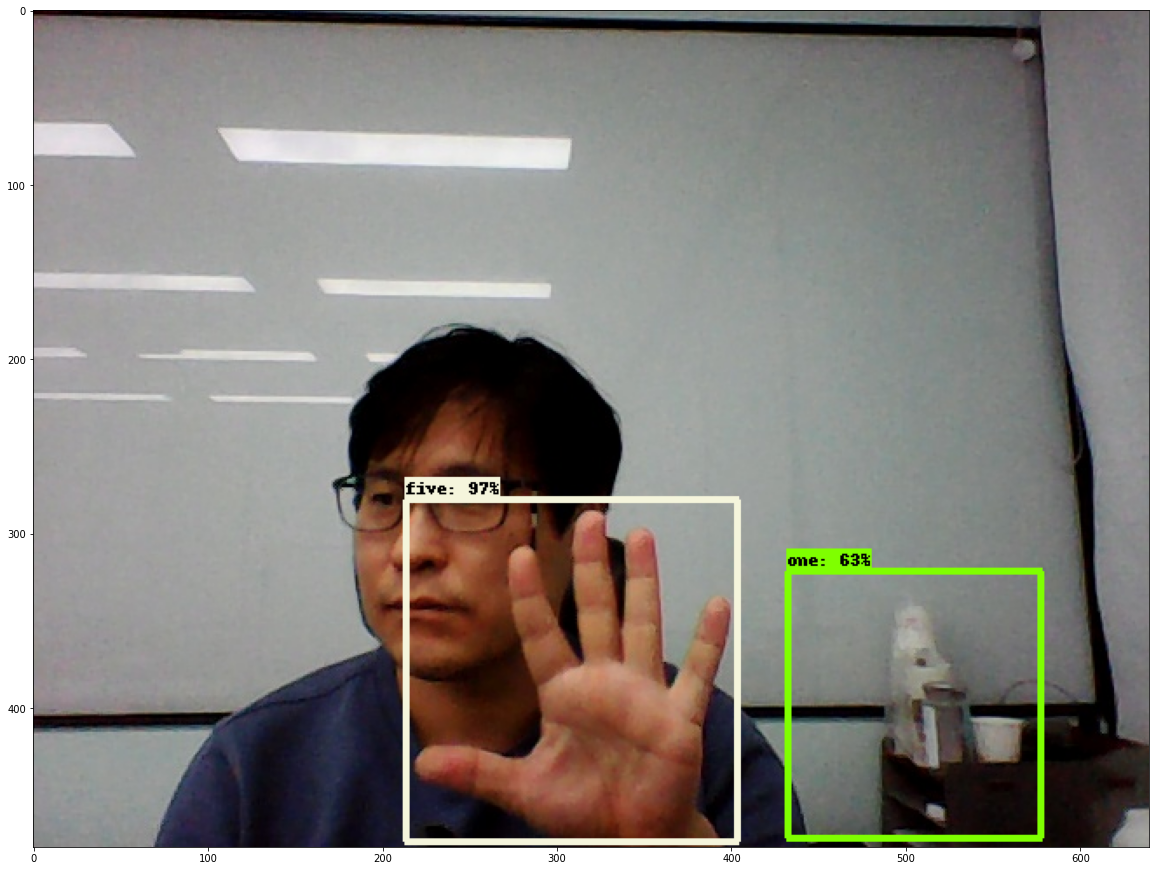

In [ ]:
result_image = cv2.resize(img, (640,480))
plt.figure(figsize=(20,20))
plt.imshow(result_image)
plt.savefig('result_one.jpg')
plt.show()